## Electrocardiogram ##

An electrocardiogram (ECG or EKG) is the electrical activity of the heart. With each beat, an electrical impulse (or “wave”) travels through the heart. This wave causes the muscle to squeeze and pump blood from the heart. A normal heartbeat on ECG will show the timing of the top and lower chambers. 

The right and left atria or upper chambers make the first wave called a “P wave" — following a flat line when the electrical impulse goes to the bottom chambers. The right and left bottom chambers or ventricles make the next wave called a “QRS complex." The final wave or “T wave” represents electrical recovery or return to a resting state for the ventricles.


<img src="http://www.wikidoc.org/images/5/53/SinusRhythmLabels.png" alt="ECG sample" width="250" height="250">
Sample of ECG signal


## Heart Rate Variablility ##

Heart Rate Variablility (HRV) also known as RR variability is the time difference between two QRS peaks.
<img src="https://support.polar.com/support_files/us-en/85256F470048B0BC852577EC004BAA51/1.gif" alt="ECG sample" width="450" height="250">

Calculating and ploting the HRV overtime allows you to determine whether the person stress calm state or a stress.
<img src="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAjSAAAAJGFlZDY1MTZiLWEwODEtNDFkNy1iYzA2LTE0YzU4YThhMjNhMg.jpg" alt="ECG sample" width="400" height="250">




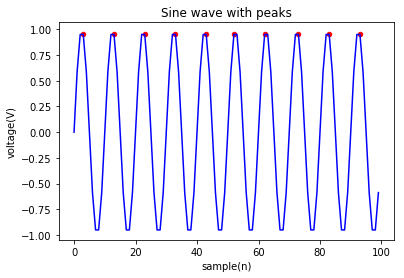

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def peak_detector(x):
    # Finds the index of the peaks for a signal/vector x
    peak_index = []
    x_prev_point = x[0]
    for i in range(len(x)):
        if i == len(x)-1: # since there is no value at x[i+1] when i = len(x) and there is no value at i = len(x)
            break
        elif x[i] > x_prev_point and x[i] > x[i+1]:
            peak_index.append(i)
        x_prev_point = x[i]
    return peak_index
    
sample = 100

# https://stackoverflow.com/questions/10698858/built-in-range-or-numpy-arange-which-is-more-efficient
x = np.arange(sample)   # x = range(100) is find too. but numpy.range is faster
y = np.sin(2 * np.pi * x / 10)

peak_index = peak_detector(y)

plt.plot(x, y,  color='blue')
plt.scatter(x[peak_index], y[peak_index], color='red', s=20)
plt.title("Sine wave with peaks")
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

## Read Electrocardiogram ##

In [22]:
# Helper functions

# https://stackoverflow.com/questions/4998629/python-split-string-with-multiple-delimiters
# https://stackoverflow.com/questions/7501609/python-re-split-vs-split
def covert_time(time_stamps):
    '''
    ARGUMENTS:
        time_stamps - A list of time stamps where each time stamps has the format 'mm:ss.mmm' of type string 
    OUTPUTS:
        new_time_stamps - A list of time stamps where each time stamps is the time in seconds 
    ''' 
    
    The format of the of the time vectors are of 'mm:ss.mmm'. 
    # The function returns 
    import re
    
    MINUTES_TO_SECONDS = 60    
    new_time_stamps = []
    for time in time_stamps:
        time = time.replace("'", "")        
        time_split = re.split(':| . ' ,time) 
        print(time_split)
        time_min = float(time_split[0])
        time_sec = float(time_split[1])    
        new_time_stamps.append(time_min*MINUTES_TO_SECONDS*time_sec)
    return new_time_stamps

# https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
# PhysioNet offers free web access to large collections of recorded physiologic signals
# Link to the research article: http://physionet.caregroup.harvard.edu/physiobank/database/ptbdb/
# Downloaded data here: https://physionet.org/cgi-bin/atm/ATM

import pandas as pd 

ecg_short_df = pd.read_csv("s0010_re_short.csv")
ecg_full_df = pd.read_csv("s0010_re_full.csv", dtype = "object", low_memory = "False") # there were errors so added parameters

ecg_short_df.head()

,'Elapsed time','i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'
0,'hh:mm:ss.mmm','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV'
1,'0:00.000',-0.244,-0.229,0.015,0.237,-0.130,-0.107,-0.044,-0.120,-0.056,0.106,0.197,0.195,-0.002,0.060,-0.009
2,'0:00.001',-0.242,-0.234,0.009,0.238,-0.126,-0.113,-0.042,-0.117,-0.051,0.110,0.202,0.198,-0.002,0.061,-0.010
3,'0:00.002',-0.241,-0.234,0.007,0.238,-0.124,-0.114,-0.044,-0.118,-0.053,0.110,0.201,0.197,-0.004,0.056,-0.009
4,'0:00.003',-0.241,-0.229,0.012,0.235,-0.126,-0.109,-0.045,-0.117,-0.051,0.112,0.201,0.197,-0.002,0.053,-0.008


In [5]:
# Remove first column

ecg_short_df = ecg_short_df[1:]
ecg_full_df = ecg_full_df[1:]

ecg_short_df.head()

,'Elapsed time','i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'
1,'0:00.000',-0.244,-0.229,0.015,0.237,-0.130,-0.107,-0.044,-0.120,-0.056,0.106,0.197,0.195,-0.002,0.060,-0.009
2,'0:00.001',-0.242,-0.234,0.009,0.238,-0.126,-0.113,-0.042,-0.117,-0.051,0.110,0.202,0.198,-0.002,0.061,-0.010
3,'0:00.002',-0.241,-0.234,0.007,0.238,-0.124,-0.114,-0.044,-0.118,-0.053,0.110,0.201,0.197,-0.004,0.056,-0.009
4,'0:00.003',-0.241,-0.229,0.012,0.235,-0.126,-0.109,-0.045,-0.117,-0.051,0.112,0.201,0.197,-0.002,0.053,-0.008
5,'0:00.004',-0.232,-0.227,0.004,0.230,-0.118,-0.112,-0.045,-0.117,-0.050,0.112,0.200,0.199,0.001,0.054,-0.009


In [6]:
ecg_short_df.iloc[:,0] = covert_time(ecg_short_df.iloc[:,0]) 
ecg_full_df.iloc[:,0] = covert_time(ecg_full_df.iloc[:,0])

ecg_short_df.head()

,'Elapsed time','i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz'
1,0.000,-0.244,-0.229,0.015,0.237,-0.130,-0.107,-0.044,-0.120,-0.056,0.106,0.197,0.195,-0.002,0.060,-0.009
2,0.001,-0.242,-0.234,0.009,0.238,-0.126,-0.113,-0.042,-0.117,-0.051,0.110,0.202,0.198,-0.002,0.061,-0.010
3,0.002,-0.241,-0.234,0.007,0.238,-0.124,-0.114,-0.044,-0.118,-0.053,0.110,0.201,0.197,-0.004,0.056,-0.009
4,0.003,-0.241,-0.229,0.012,0.235,-0.126,-0.109,-0.045,-0.117,-0.051,0.112,0.201,0.197,-0.002,0.053,-0.008
5,0.004,-0.232,-0.227,0.004,0.230,-0.118,-0.112,-0.045,-0.117,-0.050,0.112,0.200,0.199,0.001,0.054,-0.009


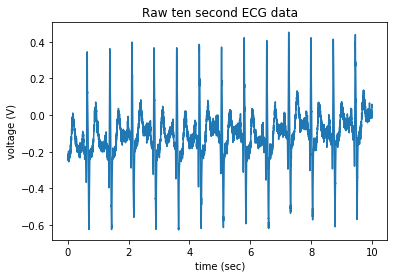

In [25]:
# short ECG data
time_short = np.array(ecg_short_df.iloc[:,0], dtype=pd.Series)
ecg_short = np.array(ecg_short_df.iloc[:,1], dtype=pd.Series)

# full ECG data
time_full= np.array(ecg_full_df.iloc[:,0], dtype=pd.Series)
ecg_full= np.array(ecg_full_df.iloc[:,1], dtype=pd.Series)

# solution to issue since the first index has strings instead of floats. Read more here:
# https://stackoverflow.com/questions/35109623/numpy-ndarray-object-has-no-attribute-find-while-trying-to-generate-boxplot
time_short = time_short.astype(np.float)
ecg_short = ecg_short.astype(np.float)

time_full = time_full.astype(np.float)
ecg_full = ecg_full.astype(np.float)

# plot Raw ECG signal
plt.plot(time_short, ecg_short)
plt.title('Raw ten second ECG data')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()


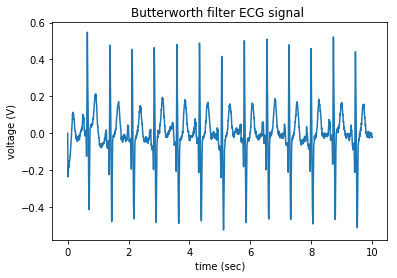

In [13]:
# Filter signal
lowcut = 0.5
highcut = 50
fs = len(time_short)/time_short[-1]-time_short[0]
ecg_short_filter = butter_bandpass_filter(ecg_short, lowcut, highcut, fs, order=3)
ecg_full_filter = butter_bandpass_filter(ecg_full, lowcut, highcut, fs, order=3)

plt.plot(time_short, ecg_short_filter)
plt.title('Butterworth filter ECG signal ')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()

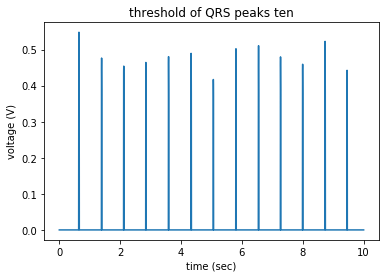

In [9]:
# threshold signal
thres = max(ecg_short)*0.80

ecg_short_thres = np.zeros((len(ecg_short_filter)))
ecg_full_thres = np.zeros((len(ecg_full_filter)))

ecg_short_thres[ecg_short_filter>thres] = ecg_short_filter[ecg_short_filter>thres]    # grab the index and plot that in. 
ecg_full_thres[ecg_full_filter>thres] = ecg_full_filter[ecg_full_filter>thres]    # grab the index and plot that in. 

# plot thresholded ECG signal
plt.plot(time_short, ecg_short_thres)
plt.title('threshold of QRS peaks ten')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()


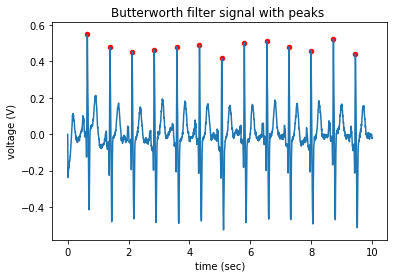

In [36]:
peak_index = peak_detector(ecg_short_thres)
peak_time = time_short[peak_index]
ecg_peak = ecg_short_filter[peak_index]

plt.plot(time_short, ecg_short_filter)
plt.scatter(peak_time, ecg_peak, color='red', s=20)
plt.title('Butterworth filter signal with peaks ')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()

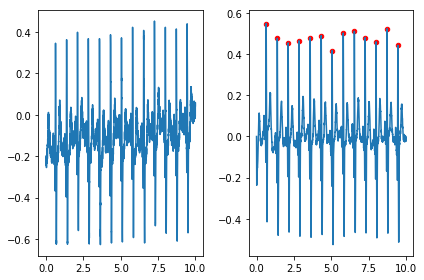

In [50]:
## show all plots in one figure

fig, ax = plt.subplots(nrows=2, ncols=2)

plt.subplot(1, 2, 1)
plt.plot(time_short, ecg_short)

plt.subplot(1, 2, 2)
plt.plot(time_short, ecg_short_filter)
plt.scatter(peak_time, ecg_peak, color='red', s=20)

plt.tight_layout()
plt.show()


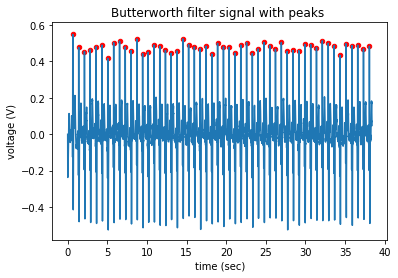

In [11]:
peak_index = peak_detector(ecg_full_thres)
peak_time = time_full[peak_index]
ecg_peak = ecg_full_filter[peak_index]

plt.plot(time_full, ecg_full_filter)
plt.scatter(peak_time, ecg_peak, color='red', s=20)
plt.title('Butterworth filter signal with peaks ')
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.show()

## Heart Rate Variability ##

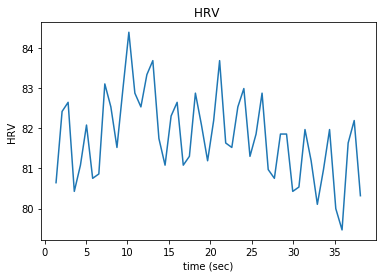

In [12]:
# https://stackoverflow.com/questions/5859144/shift-all-indices-in-numpy-array
BPM = 60

peak_index = peak_detector(ecg_full_thres)
peak_time = time_full[peak_index]
y = np.roll(peak_time, 1)
y[0] = 0  

hrv = BPM/(peak_time - y)

plt.plot(peak_time[1:], hrv[1:])
plt.title('HRV ')
plt.xlabel('time (sec)')
plt.ylabel('HRV')
plt.show()
